<a href="https://www.kaggle.com/code/swapnanilchatterjee/ai-impact-on-jobs-2030?scriptVersionId=288122336" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ai-impact-on-jobs-2030/AI_Impact_on_Jobs_2030.csv


In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv("/kaggle/input/ai-impact-on-jobs-2030/AI_Impact_on_Jobs_2030.csv")
df.head()

,Job_Title,Average_Salary,Years_Experience,Education_Level,AI_Exposure_Index,Tech_Growth_Factor,Automation_Probability_2030,Risk_Category,Skill_1,Skill_2,Skill_3,Skill_4,Skill_5,Skill_6,Skill_7,Skill_8,Skill_9,Skill_10
0,Security Guard,45795,28,Master's,0.18,1.28,0.85,High,0.45,0.10,0.46,0.33,0.14,0.65,0.06,0.72,0.94,0.00
1,Research Scientist,133355,20,PhD,0.62,1.11,0.05,Low,0.02,0.52,0.40,0.05,0.97,0.23,0.09,0.62,0.38,0.98
2,Construction Worker,146216,2,High School,0.86,1.18,0.81,High,0.01,0.94,0.56,0.39,0.02,0.23,0.24,0.68,0.61,0.83
3,Software Engineer,136530,13,PhD,0.39,0.68,0.60,Medium,0.43,0.21,0.57,0.03,0.84,0.45,0.40,0.93,0.73,0.33
4,Financial Analyst,70397,22,High School,0.52,1.46,0.64,Medium,0.75,0.54,0.59,0.97,0.61,0.28,0.30,0.17,0.02,0.42


In [4]:
df.describe()

,Average_Salary,Years_Experience,AI_Exposure_Index,Tech_Growth_Factor,Automation_Probability_2030,Skill_1,Skill_2,Skill_3,Skill_4,Skill_5,Skill_6,Skill_7,Skill_8,Skill_9,Skill_10
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,89372.279000,14.677667,0.501283,0.995343,0.501503,0.496973,0.497233,0.499313,0.503667,0.490270,0.499807,0.499160,0.502843,0.501433,0.493627
std,34608.088767,8.739788,0.284004,0.287669,0.247881,0.287888,0.288085,0.288354,0.287063,0.285818,0.286050,0.288044,0.289832,0.285818,0.286464
min,30030.000000,0.000000,0.000000,0.500000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,58640.000000,7.000000,0.260000,0.740000,0.310000,0.240000,0.250000,0.250000,0.260000,0.240000,0.260000,0.250000,0.250000,0.260000,0.250000
50%,89318.000000,15.000000,0.500000,1.000000,0.500000,0.505000,0.500000,0.500000,0.510000,0.490000,0.500000,0.490000,0.500000,0.500000,0.490000
75%,119086.500000,22.000000,0.740000,1.240000,0.700000,0.740000,0.740000,0.750000,0.750000,0.730000,0.740000,0.750000,0.750000,0.740000,0.740000
max,149798.000000,29.000000,1.000000,1.500000,0.950000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Job_Title                    3000 non-null   object 
 1   Average_Salary               3000 non-null   int64  
 2   Years_Experience             3000 non-null   int64  
 3   Education_Level              3000 non-null   object 
 4   AI_Exposure_Index            3000 non-null   float64
 5   Tech_Growth_Factor           3000 non-null   float64
 6   Automation_Probability_2030  3000 non-null   float64
 7   Risk_Category                3000 non-null   object 
 8   Skill_1                      3000 non-null   float64
 9   Skill_2                      3000 non-null   float64
 10  Skill_3                      3000 non-null   float64
 11  Skill_4                      3000 non-null   float64
 12  Skill_5                      3000 non-null   float64
 13  Skill_6           

# **Data Cleaning**

In [6]:
df.isna().sum()

Job_Title                      0
Average_Salary                 0
Years_Experience               0
Education_Level                0
AI_Exposure_Index              0
Tech_Growth_Factor             0
Automation_Probability_2030    0
Risk_Category                  0
Skill_1                        0
Skill_2                        0
Skill_3                        0
Skill_4                        0
Skill_5                        0
Skill_6                        0
Skill_7                        0
Skill_8                        0
Skill_9                        0
Skill_10                       0
dtype: int64

# *Analysis*

<Axes: xlabel='Risk_Category'>

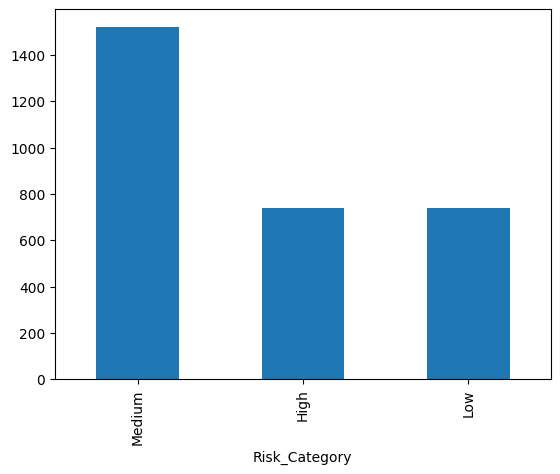

In [7]:
df['Risk_Category'].value_counts().plot(kind='bar')

In [8]:
top_risky_jobs=df.sort_values("Automation_Probability_2030",ascending=False).head(20)
top_risky_jobs[['Job_Title','Automation_Probability_2030']]

,Job_Title,Automation_Probability_2030
2261,Retail Worker,0.95
2292,Retail Worker,0.95
2121,Construction Worker,0.95
2933,Customer Support,0.95
2138,Truck Driver,0.95
2376,Retail Worker,0.95
87,Retail Worker,0.95
1021,Security Guard,0.95
1740,Truck Driver,0.95
2856,Security Guard,0.95


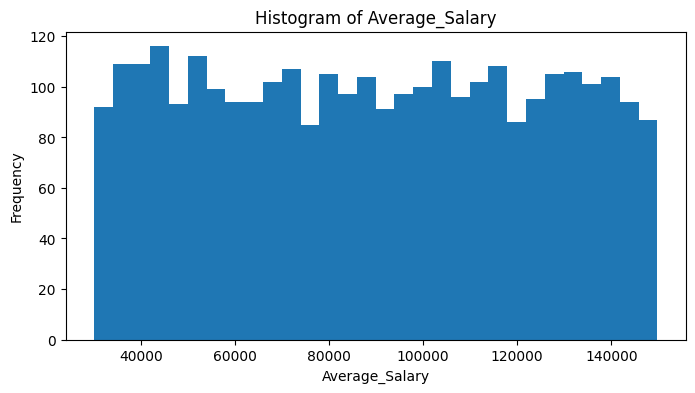

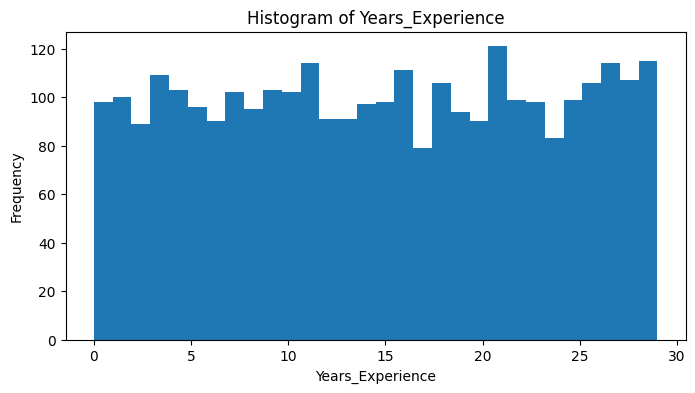

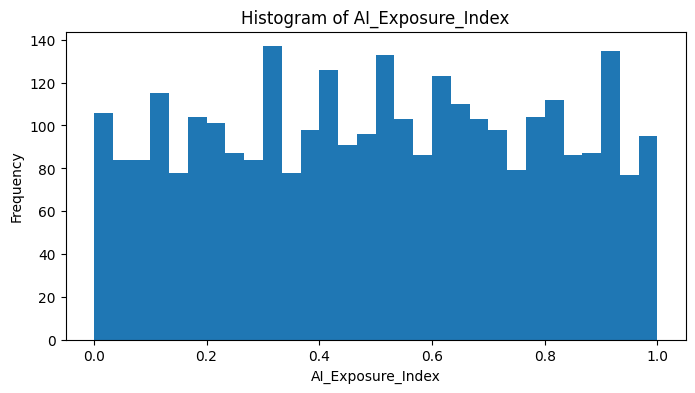

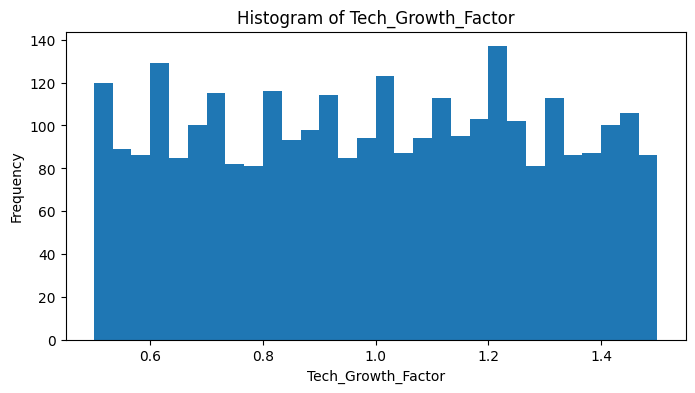

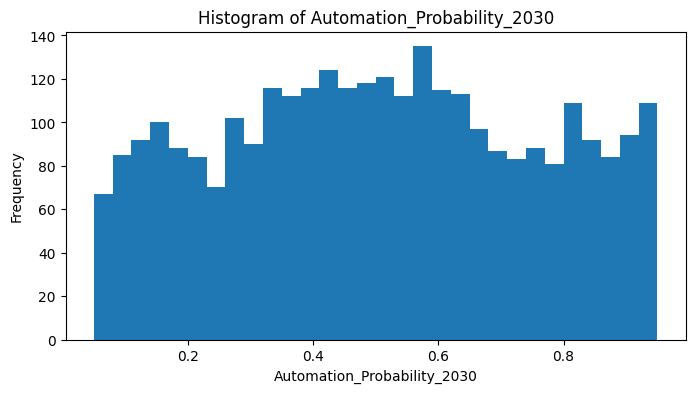

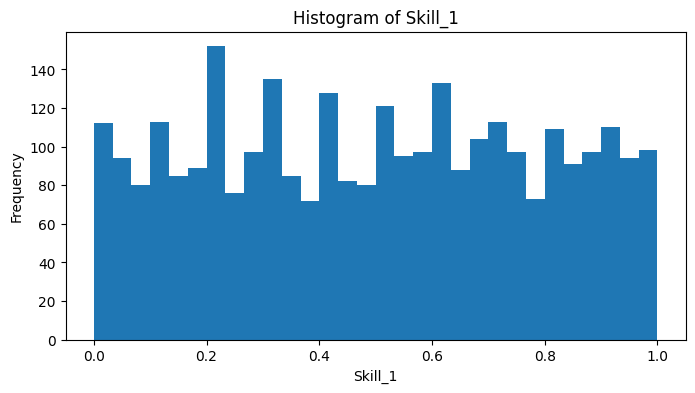

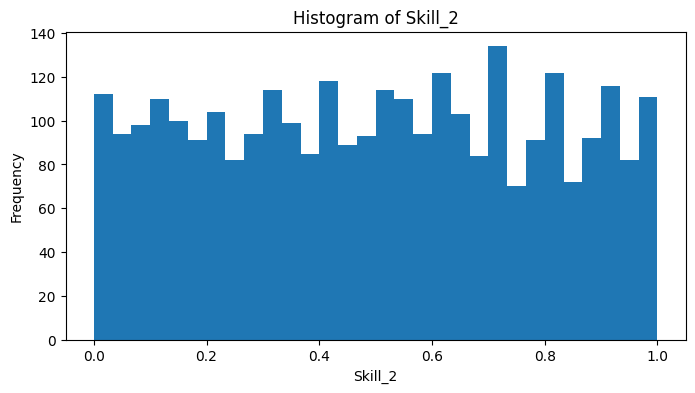

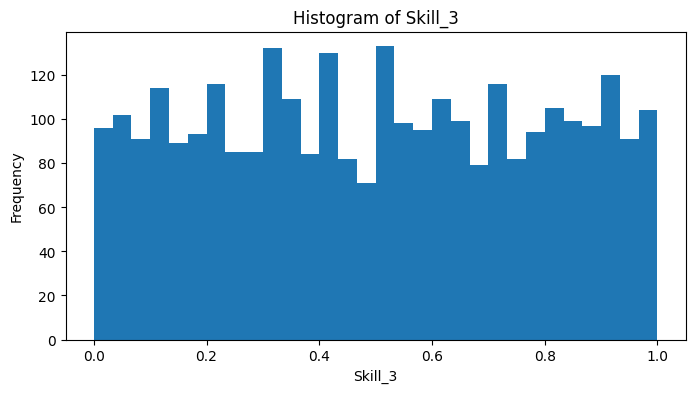

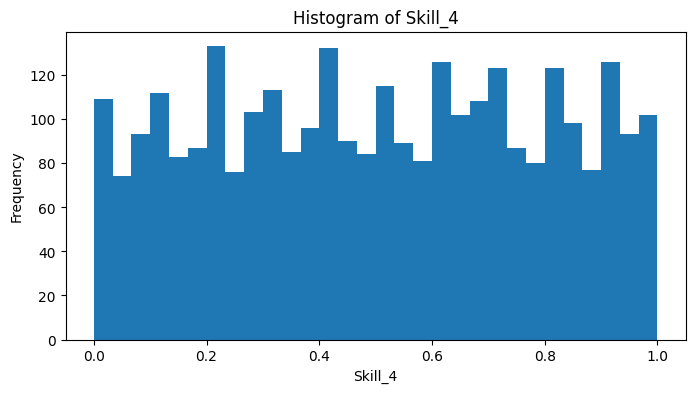

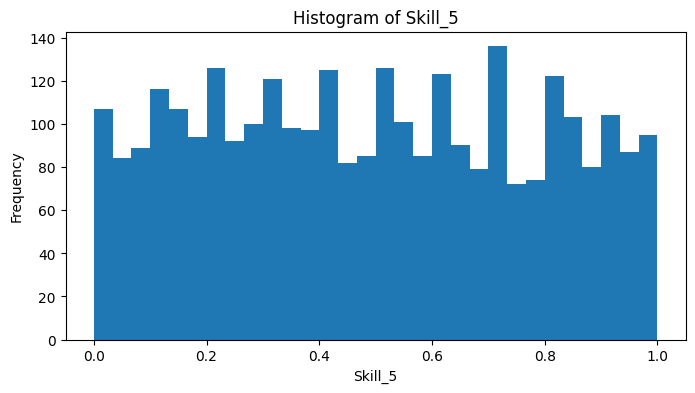

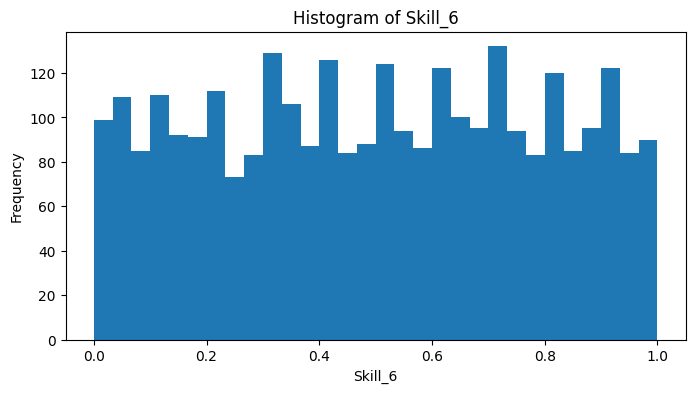

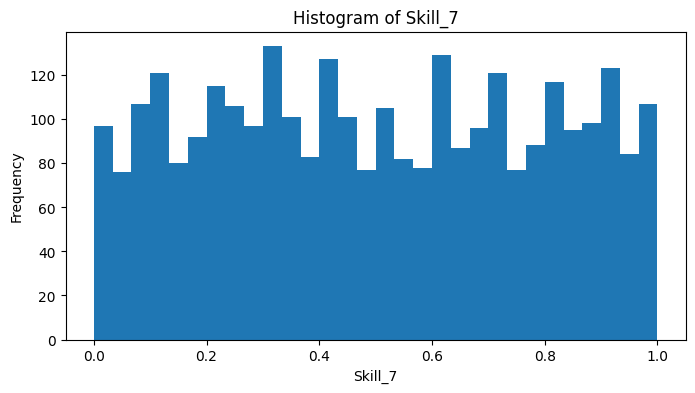

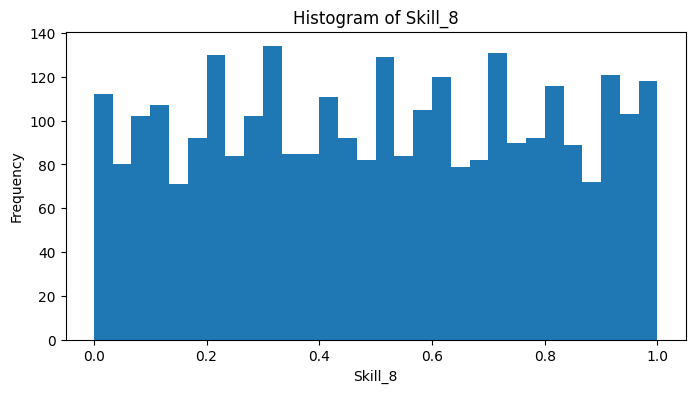

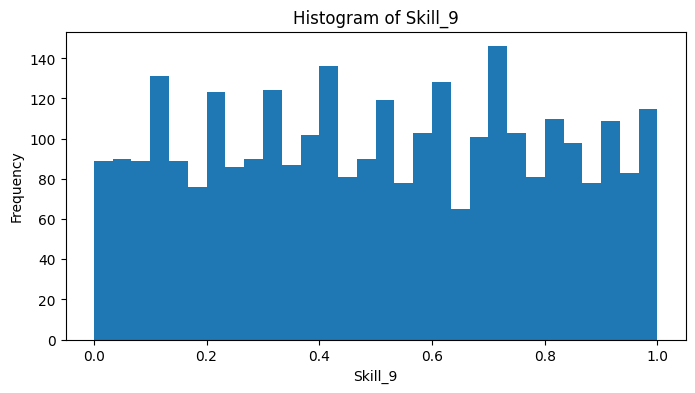

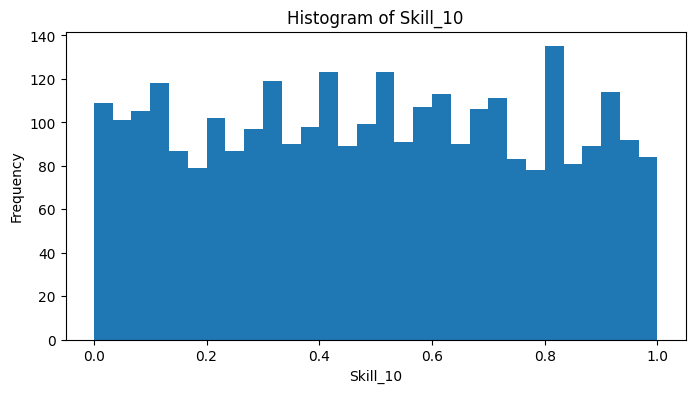

In [9]:
cols=df.select_dtypes(include=['int64','float64']).columns
for col in cols:
    plt.figure(figsize=(8,4))
    plt.hist(df[col].dropna(),bins=30)
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

In [10]:
df['Skill_Average']=df[[f"Skill_{i}" for i in range(1,11)]].mean(axis=1)
df[['Job_Title','Skill_Average']].head()

,Job_Title,Skill_Average
0,Security Guard,0.385
1,Research Scientist,0.426
2,Construction Worker,0.451
3,Software Engineer,0.492
4,Financial Analyst,0.465


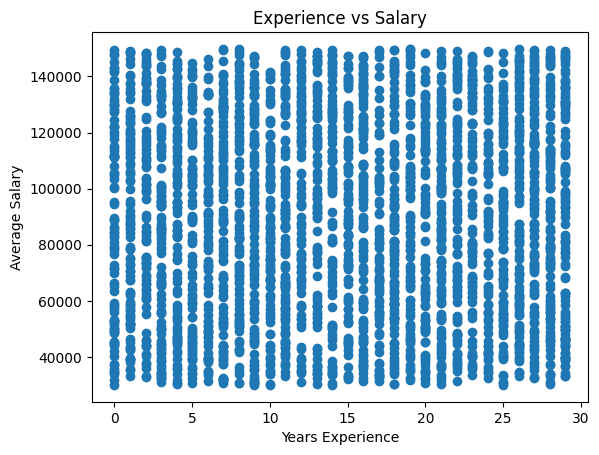

In [11]:
plt.scatter(df['Years_Experience'],df['Average_Salary'])
plt.xlabel("Years Experience")
plt.ylabel("Average Salary")
plt.title("Experience vs Salary")
plt.show()

In [12]:
dic={'Low':1,'Medium':2,'High':3}
df['Risk_Code']=df['Risk_Category'].map(dic)
df.corr(numeric_only=True)['Risk_Code'].sort_values(ascending=False)

Risk_Code                      1.000000
Automation_Probability_2030    0.924843
Skill_1                        0.031474
Tech_Growth_Factor             0.022670
Skill_2                        0.018234
AI_Exposure_Index              0.017068
Skill_6                        0.011719
Skill_10                       0.011663
Skill_Average                  0.001257
Skill_9                        0.000911
Skill_4                       -0.006440
Years_Experience              -0.009110
Skill_7                       -0.012856
Skill_8                       -0.014929
Skill_3                       -0.016169
Average_Salary                -0.018352
Skill_5                       -0.019554
Name: Risk_Code, dtype: float64

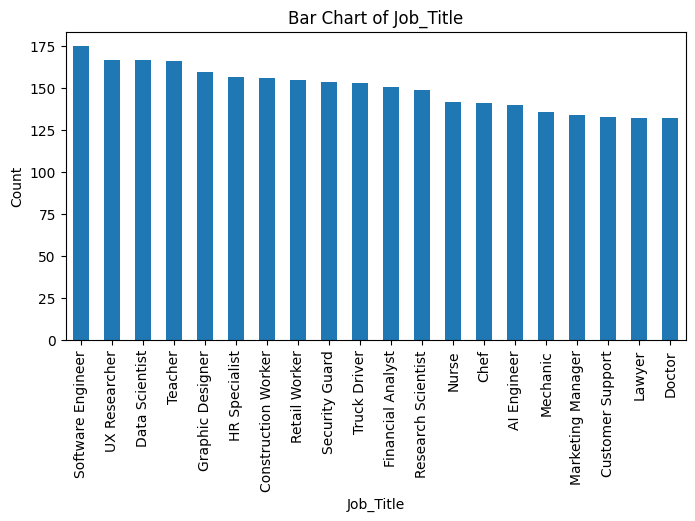

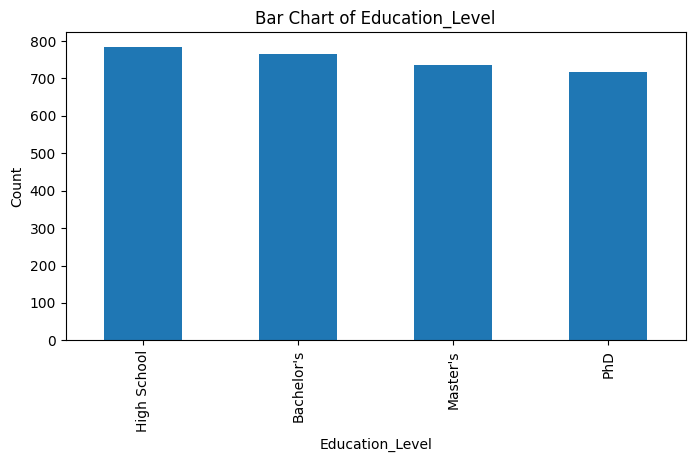

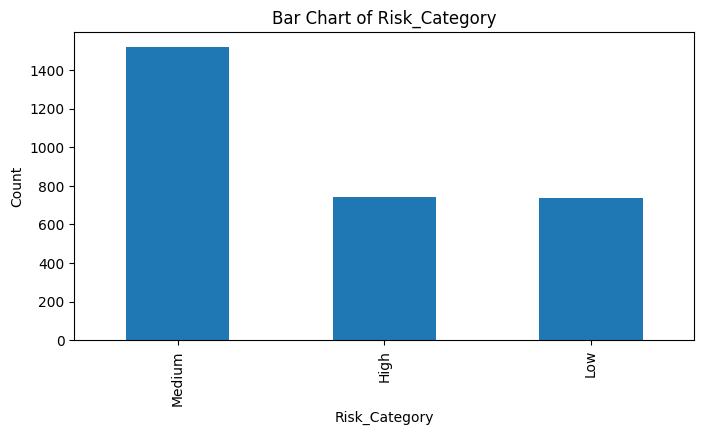

In [13]:
cat_cols = df.select_dtypes(include=['object']).columns

for col in cat_cols:
    plt.figure(figsize=(8,4))
    df[col].value_counts().plot(kind='bar')
    plt.title(f"Bar Chart of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()